In [1]:
import pickle
import yaml
from pprint import pprint

% matplotlib inline
import matplotlib.pyplot as plt


In [2]:
plots = yaml.load(open('dump/sift1b_pq_n_memory.yaml', 'rt'))["plots"]
pprint(plots)

{'B32_act': {'x': [10000, 100000, 1000000, 10000000, 100000000, 1000000000],
             'y': [377688,
                   1606836,
                   12583792,
                   155749892,
                   896385912,
                   5452351092]},
 'B32_bound': {'x': [10000, 100000, 1000000, 10000000, 100000000, 1000000000],
               'y': [251072.0,
                     1331072.0,
                     12131072.0,
                     40131072,
                     400131072,
                     4000131072]},
 'B32_linear': {'x': [10000, 100000, 1000000, 10000000, 100000000, 1000000000],
                'y': [171072.0,
                      531072.0,
                      4131072.0,
                      40131072.0,
                      400131072.0,
                      4000131072.0]},
 'B64_act': {'x': [10000, 100000, 1000000, 10000000, 100000000, 1000000000],
             'y': [647496,
                   3212120,
                   25180484,
                   442617656

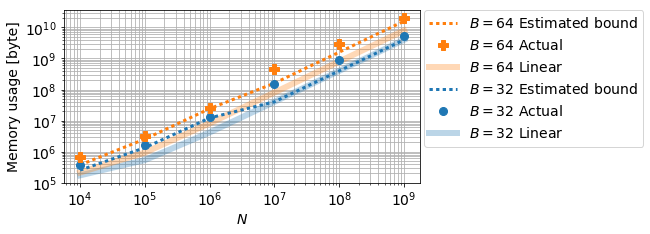

In [20]:
# Params
fontsize = 14
linewidth = 3
markersize = 8

plt.figure(figsize=[9, 3])
    

plt.plot(plots['B32_linear']['x'], plots['B32_linear']['y'], "-", lw=linewidth+3, ms=markersize, label='$B=32$ Linear', color='C0', alpha=0.3)
plt.plot(plots['B64_linear']['x'], plots['B64_linear']['y'], "-", lw=linewidth+3, ms=markersize, label='$B=64$ Linear', color='C1', alpha=0.3)
plt.plot(plots['B32_bound']['x'], plots['B32_bound']['y'], ":", lw=linewidth, ms=markersize, label='$B=32$ Estimated bound', color='C0')    
plt.plot(plots['B64_bound']['x'], plots['B64_bound']['y'], ":", lw=linewidth, ms=markersize, label='$B=64$ Estimated bound', color='C1')    
plt.plot(plots['B32_act']['x'], plots['B32_act']['y'], "o", lw=linewidth, ms=markersize, label='$B=32$ Actual', color='C0')
plt.plot(plots['B64_act']['x'], plots['B64_act']['y'], "P", lw=linewidth, ms=markersize+2, label='$B=64$ Actual', color='C1')
        
# Texts
plt.xlabel('$N$', fontsize=fontsize)
plt.ylabel('Memory usage [byte]', fontsize=fontsize)
plt.tick_params(labelsize=fontsize)

# Legend
# handlelength: if 0, delete line in legend.
# To re-order items in legend, set landles and labels
handles,labels = plt.axes().get_legend_handles_labels()
handles = [handles[3], handles[5], handles[1], handles[2], handles[4], handles[0]]
labels = [labels[3], labels[5], labels[1], labels[2], labels[4], labels[0]]
# http://matplotlib.org/users/legend_guide.html
plt.legend(handles, labels,
           bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.,
           fontsize=fontsize, handlelength=2)#, loc='upper left')



# Grid
# which='both': show more grids (useful for log scaling)
plt.grid(True, which='both')#, color='darkgray')

# Log
plt.xscale('log')
plt.yscale('log')

# Ranges
#plt.ylim([0.01, 10**4])

# Write
# Adjust white spaces when the text size is big. This is manually adjusted
# http://d.hatena.ne.jp/nohzen/20130922/1379807776
plt.subplots_adjust(left=0.1, bottom=0.17, right=0.65, top=0.97, wspace=None, hspace=None)

plt.savefig("n_memory.pdf")
